# Canada Pizza Price Prediction

In [24]:
import pandas as pd

data = pd.read_csv("pizza_price_prediction.csv")

display(data)

,company,price_cad,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,$29,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,$25,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,$19,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,$22,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,$30,18 inch,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,$11,8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,$14,12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,$17,14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,$12,8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes


### a. Count the number of null values in the pizza dataset and replace null values with average of the concerned columns.

In [3]:
print("Total Null Values in the Dataset = ",data.isnull().sum().sum())

# print(data.isnull().sum())

# display(data.fillna(data.mean()))

Total Null Values in the Dataset =  0


### b. Calculate average price of pizza prepared by each company.

In [4]:
data["price_card"] = [int(i[1:]) for i in data["price_cad"]]

print(data.groupby("company")["price_card"].mean())

company
A    19.600
B    14.375
C    13.800
D    16.600
E    14.400
Name: price_card, dtype: float64


### c. Find the companies, who prepared pizzas with different variants with same diameter.

In [5]:
d = data.groupby(['company', 'diameter']).filter(lambda x: x['variant'].nunique() > 1)

print(d['company'].unique())

['A' 'B' 'C' 'D' 'E']


### d. Which company has more pizzas? Show the result with graph.

Company C has more pizzas.


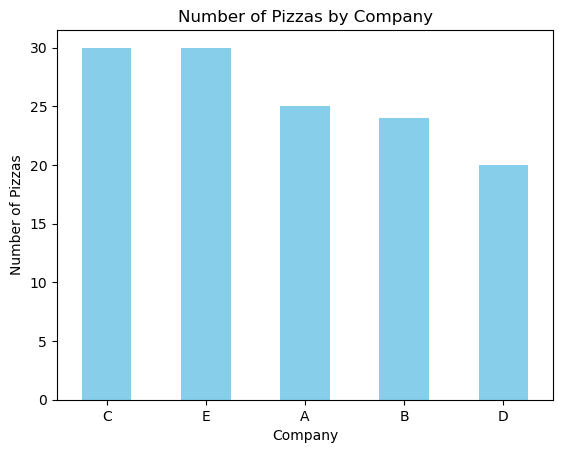

In [6]:
import matplotlib.pyplot as plt

pizza_count = data["company"].value_counts()

print(f"Company {pizza_count.index[0]} has more pizzas.")

pizza_count.plot(kind='bar', color='skyblue', xlabel="Company", ylabel="Number of Pizzas", title="Number of Pizzas by Company")
plt.xticks(rotation=0)
plt.show()

### e. Check whether the pizza data set contains null value or not. Count the no. of null values in the pizza dataset. Find the number of missing data points per column.

In [7]:
null_values = data.isnull().sum().sum()

if null_values > 0:
    print("The dataset contains null values.")
    
print(f"Total number of null values in the pizza dataset = {null_values}.")

print(data.isnull().sum())

Total number of null values in the pizza dataset = 0.
company            0
price_cad          0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
price_card         0
dtype: int64


### f. Rename the column price_cad as price.

In [8]:
data.rename(columns={"price_cad":"price"}, inplace=True)

### g. Identify the number of companies in each category.

In [9]:
print(data.groupby("variant")["company"].nunique())

variant
BBQ_meat_fiesta      2
BBQ_sausage          1
american_classic     1
american_favorite    1
classic              3
crunchy              3
double_decker        3
double_mix           2
double_signature     1
extravaganza         1
gournet_greek        1
italian_veggie       1
meat_eater           1
meat_lovers          2
neptune_tuna         1
new_york             3
spicy tuna           1
spicy_tuna           1
super_supreme        1
thai_veggie          1
Name: company, dtype: int64


### h. Identify which type of pizza is more expensive.

In [10]:
data.max()

company                      E
price                     $30 
diameter              8.5 inch
topping             vegetables
variant            thai_veggie
size                     small
extra_sauce                yes
extra_cheese               yes
extra_mushrooms            yes
price_card                  30
dtype: object

### i. Find diameter of jumbo size pizza.

In [11]:
print(data[data["size"] == "jumbo"]["diameter"])

0       22 inch
1       20 inch
4       18 inch
5     18.5 inch
6       16 inch
10    18.5 inch
11      16 inch
15    18.5 inch
16      16 inch
20      22 inch
21    18.5 inch
79    18.5 inch
80      16 inch
84      22 inch
85    18.5 inch
Name: diameter, dtype: object


### j. Any jumbo pizza with diameter less than 16 exists, remove such rows.

In [12]:
data["new_diameter"] = [float(i[:-5]) for i in data["diameter"]]

data = data[~((data["size"]=="jumbo") & (data["new_diameter"]<16))]

#data.drop(data.query("size=='jumbo' & new_diameter<16.0").index, inplace=True)

### k. Calculate average price of a pizza prepared by company A.

In [13]:
print("Average Price of pizza by company A =",data[data['company'] == 'A']['price_card'].mean())

Average Price of pizza by company A = 19.6


### l. Find the mean of the diameter and price of pizzas prepared by company C.

In [14]:
print("Average Price of pizza by company C =",data[data['company'] == 'C']['price_card'].mean())
print("Average Diameter of pizza by company C =",data[data['company'] == 'C']['new_diameter'].mean())

#print(data[data['company'] == 'C'].mean(numeric_only=True))

Average Price of pizza by company C = 13.8
Average Diameter of pizza by company C = 11.5


# M.Find the companies, who prepared pizzas with different variants with same diameter.

In [18]:
df = pd.DataFrame(data)

result = df.groupby(['company', 'diameter'])['variant'].nunique()

result = result[result > 1].reset_index()

print(result)


   company   diameter  variant
0        A    12 inch        3
1        A    14 inch        2
2        A    16 inch        4
3        A  18.5 inch        4
4        A    22 inch        2
5        A     8 inch        3
6        B    12 inch        3
7        C    12 inch       10
8        C    14 inch       10
9        C   8.5 inch       10
10       D    12 inch        4
11       D    14 inch        2
12       D  18.5 inch        2
13       E    12 inch        5
14       E    14 inch        2
15       E   8.5 inch        3


### n. Find the pizza variant with extra_mushrooms and topping with chicken.

In [15]:
print(data.query("topping=='chicken' & extra_mushrooms=='yes'")["variant"].unique())

['meat_lovers' 'double_mix' 'new_york' 'double_decker' 'classic' 'crunchy']


### O. What is the most expensive pizza in each company?

In [16]:
display(data.loc[data.groupby('company')['price_card'].idxmax()])

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price_card,new_diameter
4,A,$30,18 inch,mozzarella,double_signature,jumbo,yes,no,yes,30,18.0
36,B,$19,12 inch,smoked_beef,double_decker,medium,yes,yes,yes,19,12.0
51,C,$17,14 inch,tuna,spicy_tuna,large,yes,yes,yes,17,14.0
84,D,$28,22 inch,chicken,double_mix,jumbo,yes,yes,yes,28,22.0
111,E,$19,12 inch,smoked_beef,double_decker,medium,yes,yes,yes,19,12.0


# p. Which company has more pizzas on the menu? Show the result with graph.

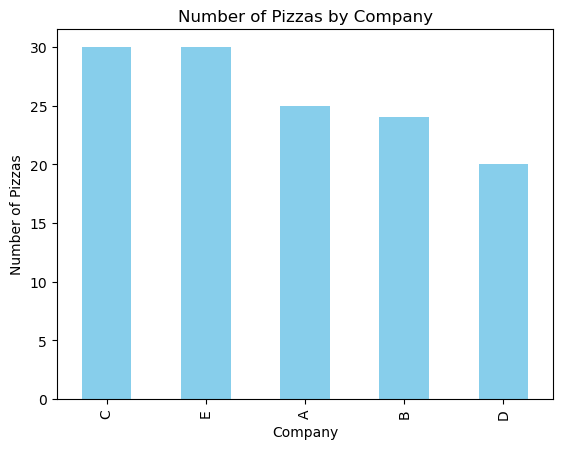

The company with the most pizzas on the menu is: C


In [22]:

import matplotlib.pyplot as plt


df = pd.DataFrame(data)
pizza_count = df['company'].value_counts()
pizza_count.plot(kind='bar', color='skyblue', xlabel="Company", ylabel="Number of Pizzas", title="Number of Pizzas by Company")
plt.show()

max_pizzas_company = pizza_count.idxmax()

print(f"The company with the most pizzas on the menu is: {max_pizzas_company}")


#  q.What is the average price of pizza in each company?

In [27]:
df = pd.DataFrame(data)

# Removing the currency symbol and convert 'price_cad' to numeric
df['price_cad'] = df['price_cad'].replace('[\$,]', '', regex=True).astype(float)
average_price = df.groupby('company')['price_cad'].mean()
print(average_price)

company
A    19.600
B    14.375
C    13.800
D    16.600
E    14.400
Name: price_cad, dtype: float64
